<a href="https://colab.research.google.com/github/OmkarSolat/Data-Science-at-ExcelR/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DBSCAN- Density-Based Spatial Clustering of Applications with Noise**

Finds core samples in regions of high density and expands clusters from them. This algorithm is good for data which contains clusters of similar density.

In [40]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [41]:
#Importing dataset

df = pd.read_csv('/content/iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [42]:
#we have to do clustering ,so for convert it into unsupervised dataset we drop some columns

df.drop(['species'], axis=1, inplace =True)
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [43]:
#Feature scaling

ss = StandardScaler()
df.iloc[:,:] = ss.fit_transform(df.iloc[:,:])

In [44]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


# Building DBSCAN model

In [45]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=8)
nbrs = nn.fit(df)
distances, indices = nbrs.kneighbors(df)

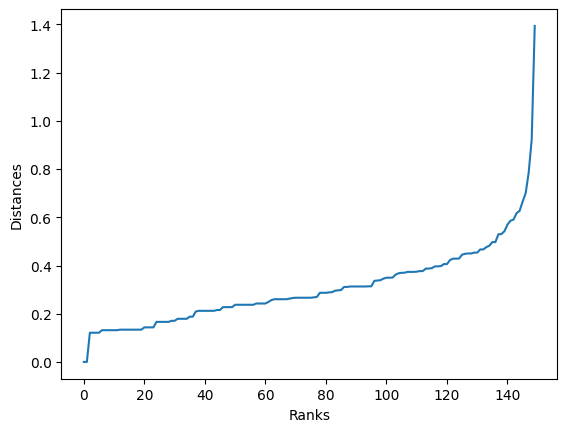

In [46]:
#sorting distances
distances = np.sort(distances,axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel('Ranks')
plt.ylabel('Distances')
plt.show()

0.5 to 0.8 distances are consider for epsilon

In [47]:
distances

array([0.        , 0.        , 0.12116787, 0.12116787, 0.12116787,
       0.12116787, 0.13163218, 0.13163218, 0.13163218, 0.13163218,
       0.13163218, 0.13163218, 0.13383627, 0.13383627, 0.13383627,
       0.13383627, 0.13383627, 0.13383627, 0.13383627, 0.13383627,
       0.14337896, 0.14337896, 0.14337896, 0.14337896, 0.16614339,
       0.16614339, 0.16614339, 0.16614339, 0.16614339, 0.17051228,
       0.17051228, 0.17890971, 0.17890971, 0.17890971, 0.17890971,
       0.18772101, 0.18772101, 0.20917957, 0.21196853, 0.21196853,
       0.21196853, 0.21196853, 0.21196853, 0.21196853, 0.21541   ,
       0.21541   , 0.22734971, 0.22734971, 0.22734971, 0.22734971,
       0.23710977, 0.23710977, 0.23710977, 0.23710977, 0.23710977,
       0.23710977, 0.23710977, 0.24233574, 0.24233574, 0.24233574,
       0.24233574, 0.24891184, 0.25673434, 0.26013882, 0.26013882,
       0.26013882, 0.26013882, 0.26013882, 0.26270691, 0.26517463,
       0.2662756 , 0.2662756 , 0.2662756 , 0.2662756 , 0.26627

In [48]:
#MinPts = D(no.of columns) + 1 = 4 + 1 = 5

In [49]:
dbscan = DBSCAN(eps=0.7, min_samples=5)
dbscan.fit_predict(df)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [50]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [51]:
#creating cluster

df['cluster'] = dbscan.labels_
df

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,1
146,0.553333,-1.282963,0.705921,0.922303,1
147,0.795669,-0.131979,0.819596,1.053935,1
148,0.432165,0.788808,0.933271,1.448832,1


In [52]:
#Filtering to get noisy datapoints
df[df['cluster']==-1]

,sepal_length,sepal_width,petal_length,petal_width,cluster
15,-0.173674,3.090775,-1.283389,-1.052180,-1
41,-1.627688,-1.743357,-1.397064,-1.183812,-1
106,-1.143017,-1.282963,0.421734,0.659038,-1
109,1.643844,1.249201,1.331133,1.712096,-1
117,2.249683,1.709595,1.672157,1.317199,-1
131,2.492019,1.709595,1.501645,1.053935,-1


# Performance

In [53]:
from sklearn.metrics import silhouette_score

In [54]:
silhouette_score(df,df['cluster'])

0.5712290442315955

In [55]:
#Silhouette score :
#Range ->  (-1,1)
#-1 ->  overlapping clusters (worst score)
#+1 ->  Distict clusters (Best score)

Silhouette score should close to +1(best score)  which indicates  good model performance.